## Types of visualizations

In this chapter, you'll learn how to create line plots, bar plots, histograms, and boxplots. You'll see how each plot requires different methods of data manipulation and preparation, and you’ll understand how each of these plot types plays a different role in data analysis.

### Visualizing median GDP per capita over time
A line plot is useful for visualizing trends over time. 
In this exercise, you'll examine how the median GDP per 
capita has changed over time.

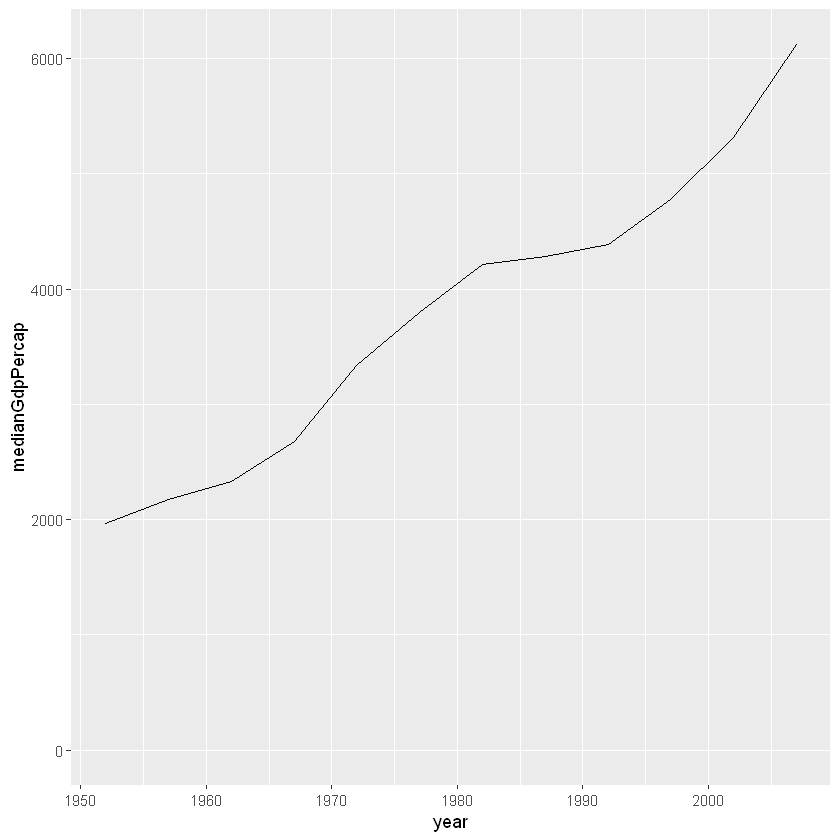

In [3]:
# Use group_by() and summarize() to find the median GDP per 
# capita within each year, calling the output column 
# medianGdpPercap. Use the assignment operator <- to save 
# it to a dataset called by_year

# install packages
# install.packages(dplyr)
# install.packages("gapminder")
# install.packages("ggplot2")
# load packages
library(gapminder)
library(dplyr)
library(ggplot2)

by_year <- gapminder %>%
    group_by(year)   %>%
    summarize(medianGdpPercap = median(gdpPercap))

# Use the by_year dataset to create a line plot showing 
# the change in median GDP per capita over time. 
# Be sure to use expand_limits(y = 0) to include 0 
# on the y-axis.

ggplot(by_year, aes(x = year, y = medianGdpPercap)) + geom_line() + expand_limits(y = 0)



### Visualizing median GDP per capita by continent over time
In the last exercise you used a line plot to visualize 
the increase in median GDP per capita over time. 
Now yo u'll examine the change within each continent.

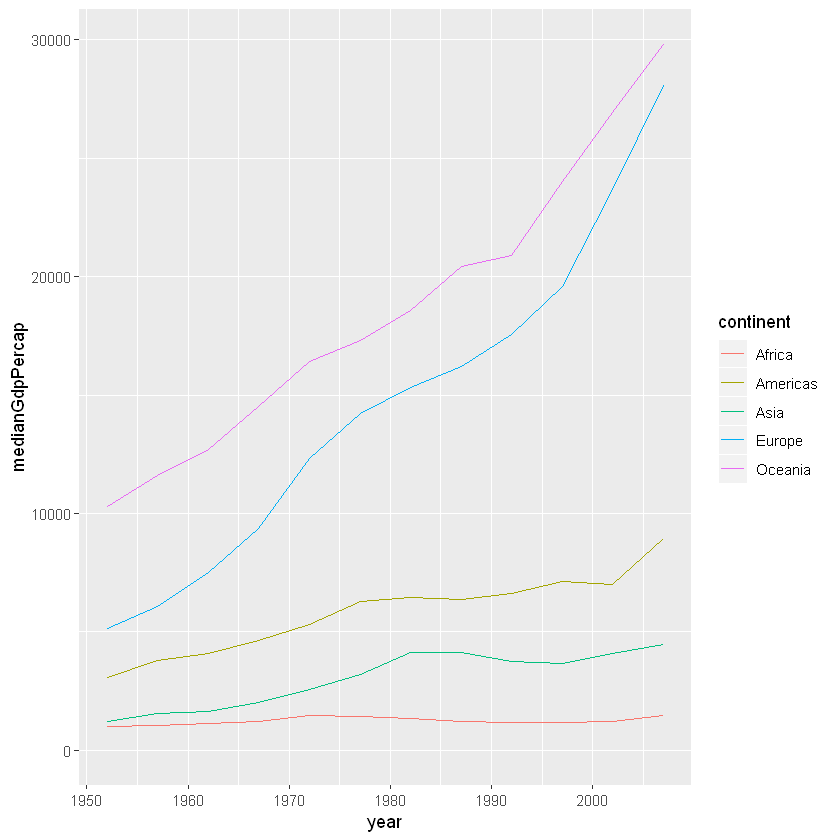

In [7]:
# Use group_by() and summarize() to find the 
# median GDP per capita within each year and continent, 
# calling the output column medianGdpPercap. 
# Use the assignment operator <- to save it to a 
# dataset called by_year_continent.

by_year_continent <- gapminder %>%
    group_by(year, continent) %>%
    summarize(medianGdpPercap = median(gdpPercap))

# Use the by_year_continent dataset to create a line plot 
# showing the change in median GDP per capita over time, 
# with color representing continent. Be sure to use 
# expand_limits(y = 0) to include 0 on the y-axis.

ggplot(by_year_continent, aes(x = year, y = medianGdpPercap, 
                             color = continent)) + geom_line() + expand_limits(y = 0)


### Visualizing median GDP per capita by continent
A bar plot is useful for visualizing summary statistics, 
such as the median GDP in each continent.

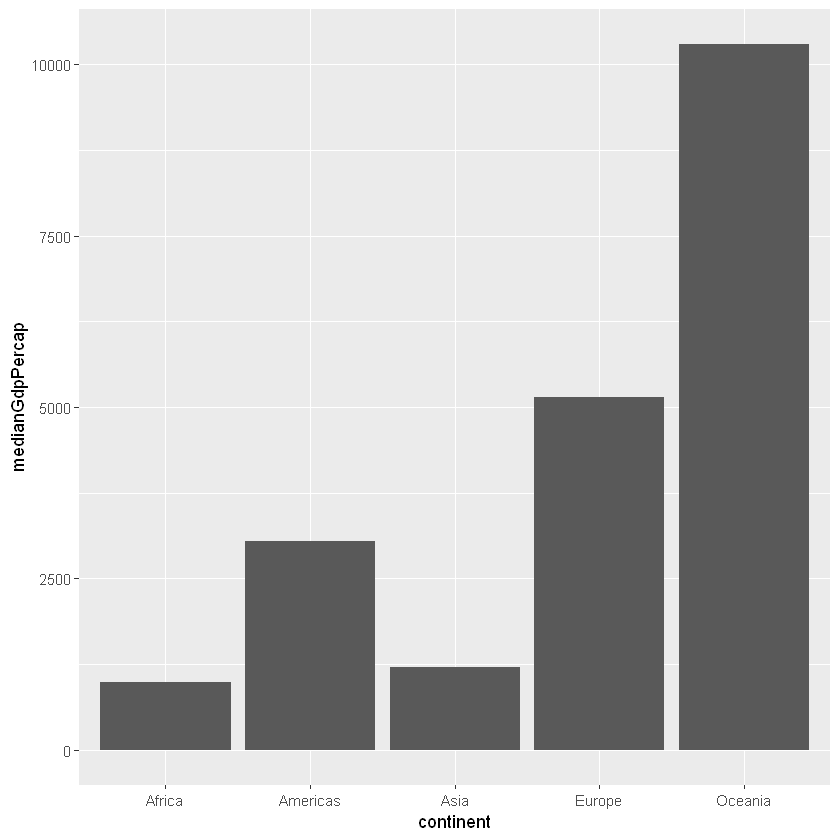

In [9]:
# Use group_by() and summarize() to find 
# the median GDP per capita within each continent in the year 
# 1952, calling the output column medianGdpPercap. 
# Use the assignment operator <- to save it to a 
# dataset called by_continent.

by_continent <- gapminder %>%
    filter (year == 1952) %>%
    group_by(continent) %>%
    summarize(medianGdpPercap = median(gdpPercap))

# Use the by_continent dataset to create a bar plot showing 
# the median GDP per capita in each continent.

ggplot(by_continent, aes(x = continent, y = medianGdpPercap)) + geom_col()


### Visualizing GDP per capita by country in Oceania
You've created a plot where each bar represents 
one continent, showing the median GDP per capita for each. 
But the x-axis of the bar plot doesn't have to be 
the continent: you can instead create a bar plot 
where each bar represents a country.
In this exercise, you'll create a bar plot comparing 
the GDP per capita between the two countries in the Oceania 
continent (Australia and New Zealand).

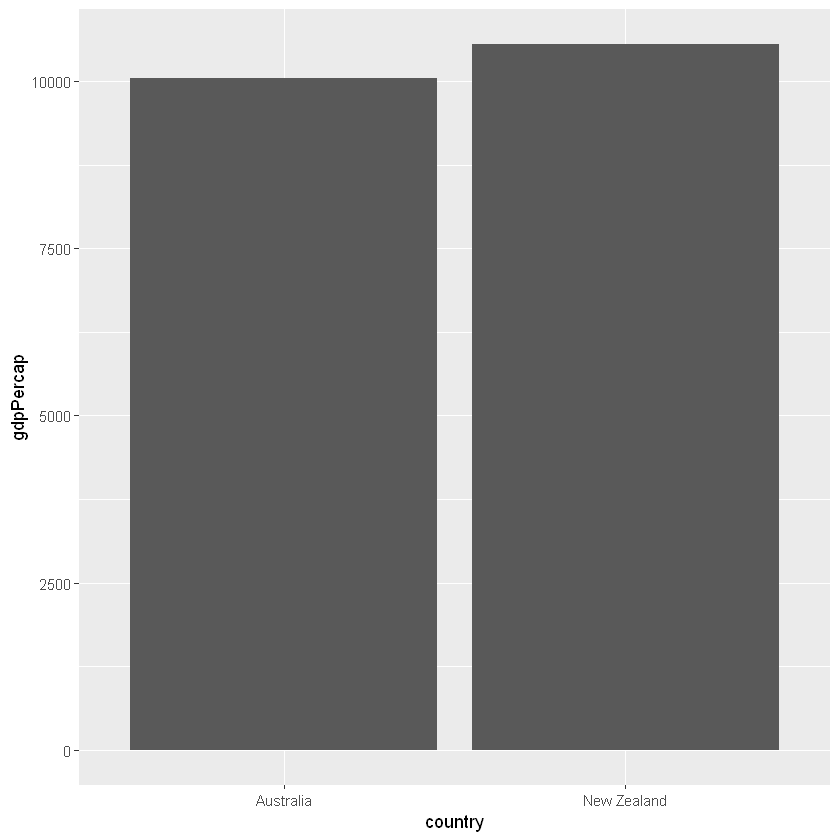

In [12]:
# Filter for observations in the Oceania continent 
# in the year 1952. Save this as oceania_1952.

oceania_1952 <- gapminder %>%
    filter(continent == 'Oceania', year == 1952)

# Use the oceania_1952 dataset to create a bar plot, 
# with country on the x-axis and gdpPercap on the y-axis.

ggplot(oceania_1952, aes(x = country, y = gdpPercap)) + geom_col()

### Visualizing population
A histogram is useful for examining the distribution of 
a numeric variable. In this exercise, you'll create a 
histogram showing the distribution of country populations 
(by millions) in the year 1952.

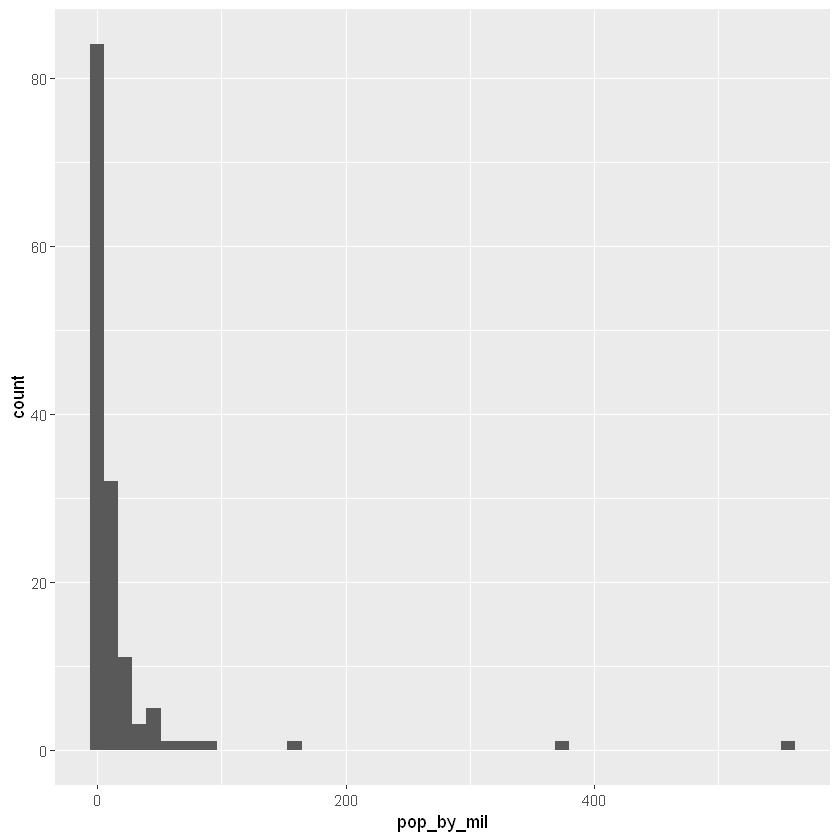

In [13]:
# Use the gapminder_1952 dataset to create a histogram 
# of country population (pop_by_mil) in the year 1952. 
# Inside the histogram geom, set the number of bins to 50

gapminder_1952 <- gapminder %>%
  filter(year == 1952) %>%
  mutate(pop_by_mil = pop / 1000000)

ggplot(gapminder_1952, aes(x = pop_by_mil)) + geom_histogram(bins = 50)

### Visualizing population with x-axis on a log scale
In the last exercise you created a histogram of populations 
across countries.You might have noticed that there were 
several countries with a much higher population than others,
which causes the distribution to be very skewed, with most 
of the distribution crammed into a small part of the graph. 
(Consider that it's hard to tell the median or the minimum 
population from that histogram).
To make the histogram more informative, you can 
try putting the x-axis on a log scale.

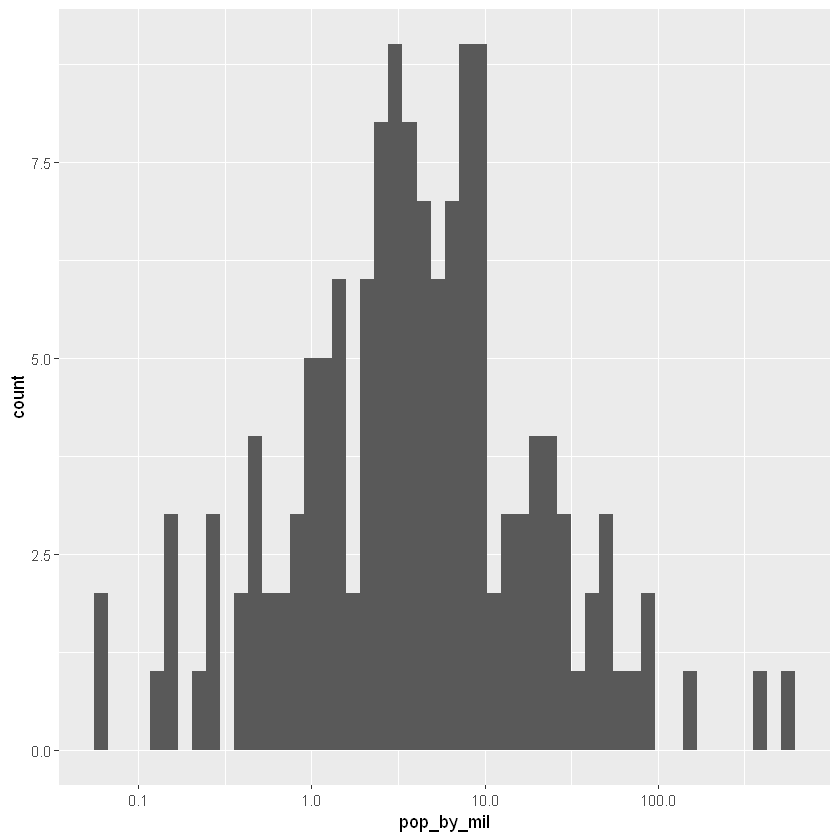

In [14]:
# Use the gapminder_1952 dataset (code is provided) to create 
# a histogram of country population (pop) in the year 1952, 
# putting the x-axis on a log scale with scale_x_log10().

ggplot(gapminder_1952, aes(x = pop_by_mil)) + geom_histogram(bins = 50) + scale_x_log10() 

### Comparing GDP per capita across continents
A boxplot is useful for comparing a distribution of values 
across several groups. In this exercise, you'll examine the 
distribution of GDP per capita by continent. 
Since GDP per capita varies across several orders of 
magnitude, you'll need to put the y-axis on a log scale.

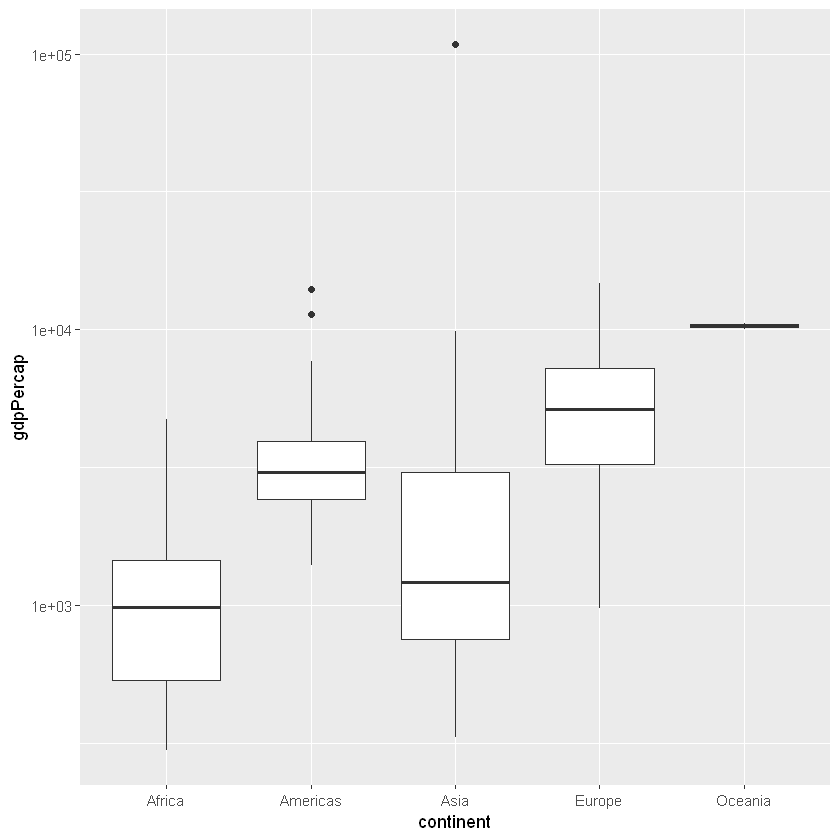

In [18]:
# Use the gapminder_1952 dataset to create a boxplot comparing GDP
# per capita (gdpPercap) among continents. Put the y-axis 
# on a log scale with scale_y_log10().

gapminder_1952 <- gapminder %>%
  filter(year == 1952)

# Create a boxplot comparing gdpPercap among continents
ggplot(gapminder_1952, aes(x = continent, y = gdpPercap)) + geom_boxplot() + scale_y_log10() 

### Adding a title to your graph
There are many other options for customizing a ggplot2 graph,
which you can learn about in other DataCamp courses. 
You can also learn about them from online resources, 
which is an important skill to develop.

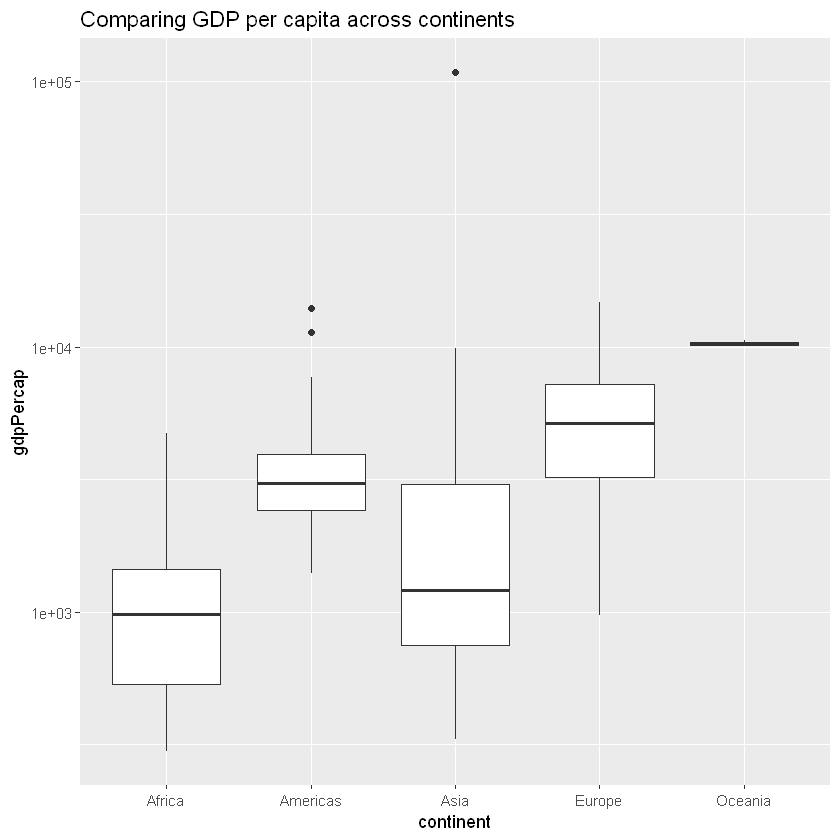

In [19]:
# Add a title to the graph: Comparing GDP per capita across 
# continents. 

# Add a title to this graph: "Comparing GDP per capita across continents"
ggplot(gapminder_1952, aes(x = continent, y = gdpPercap)) +
  geom_boxplot() +
  scale_y_log10() + ggtitle ("Comparing GDP per capita across continents")